In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit

In [183]:
#Q.1 - Predict delivery time using sorting time 
# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model

## Load the data

In [184]:
data = pd.read_csv('C:\\Users\\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Simple LR\\delivery_time.csv')

In [185]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA & Visualization

In [186]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Visualization

<IPython.core.display.Javascript object>


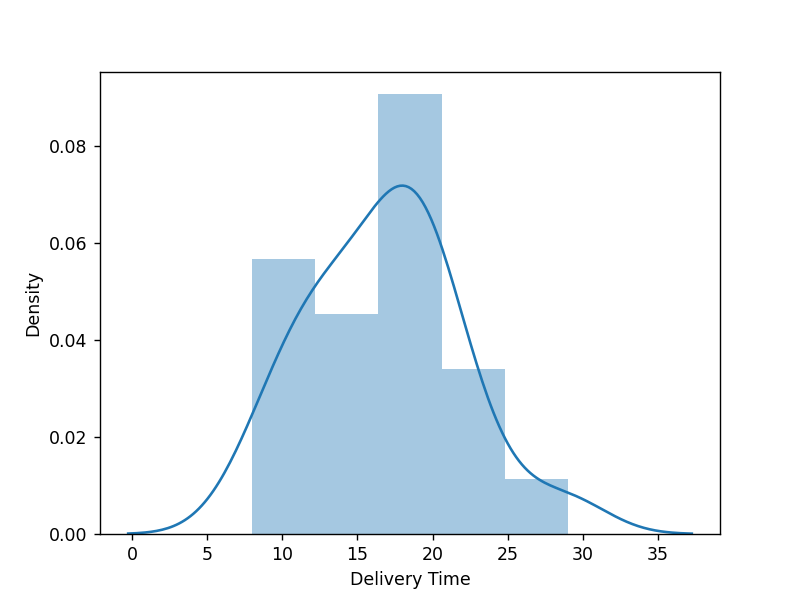

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

In [188]:
sns.distplot(data['Delivery Time'])

<IPython.core.display.Javascript object>


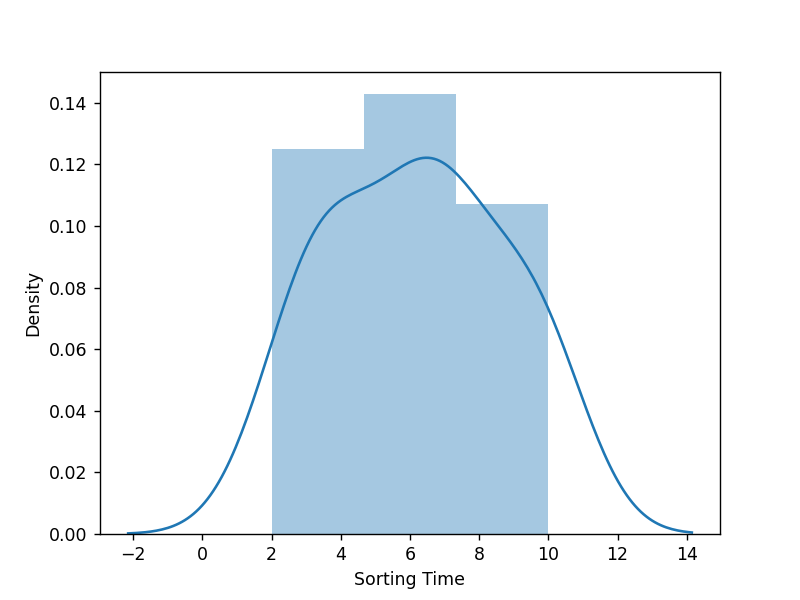

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

In [190]:
sns.distplot(data['Sorting Time'])

<IPython.core.display.Javascript object>


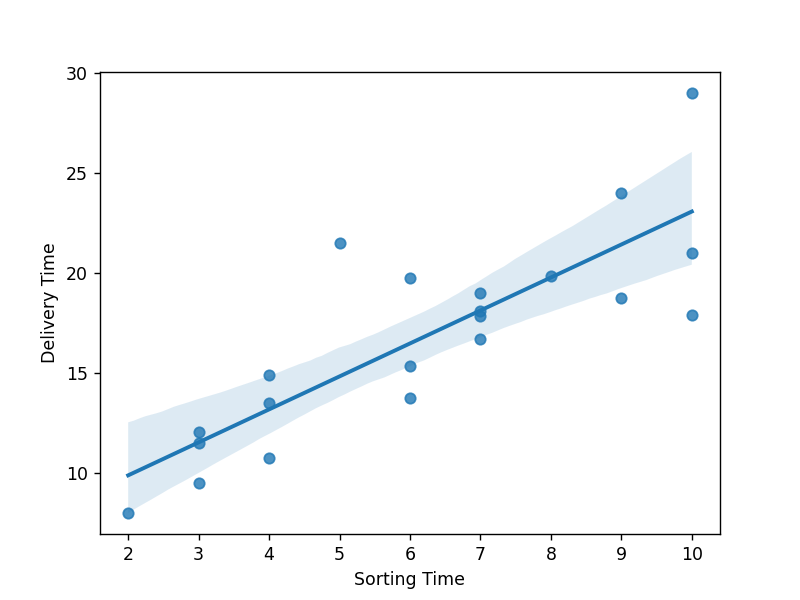

In [191]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data);

In [149]:
# Renaming Columns
data=data.rename({'Delivery Time':'Delivery_time', 'Sorting Time':'Sorting_time'},axis=1)
data

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [150]:
data.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


# Built new model

In [151]:
model = smf.ols("Delivery_time~Sorting_time",data = data).fit()

In [152]:
#Coefficients
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [153]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
Sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [154]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new model

In [155]:
# Manual prediction sorting time 4
Delivery_Time = (6.582734) + (1.649020)*(4)
Delivery_Time

13.178814

In [156]:
#Predict for sorting time 4, 7
newdata=pd.Series([4,7])
newdata

0    4
1    7
dtype: int64

In [157]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_time'])


In [158]:
data_pred

,Sorting_time
0,4
1,7


In [159]:
model.predict(data_pred)

0    13.178814
1    18.125873
dtype: float64

In [160]:
#Q.2 Build a prediction model for Salary_hike
# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model

# Import Data

In [161]:
df = pd.read_csv('C:\\Users\\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Simple LR\\Salary_Data.csv')

In [162]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [164]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Plot the Data

<IPython.core.display.Javascript object>


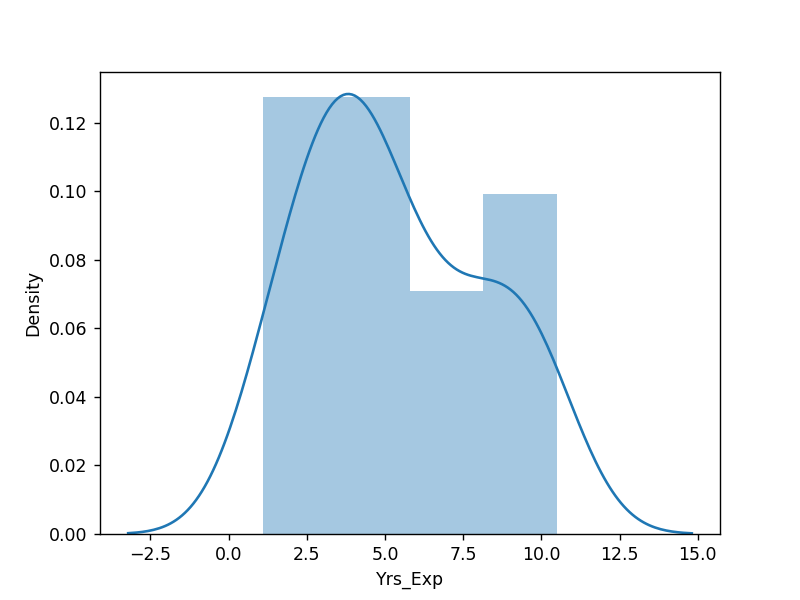

<AxesSubplot:xlabel='Yrs_Exp', ylabel='Density'>

In [206]:
sns.distplot(df['Yrs_Exp'])

<IPython.core.display.Javascript object>


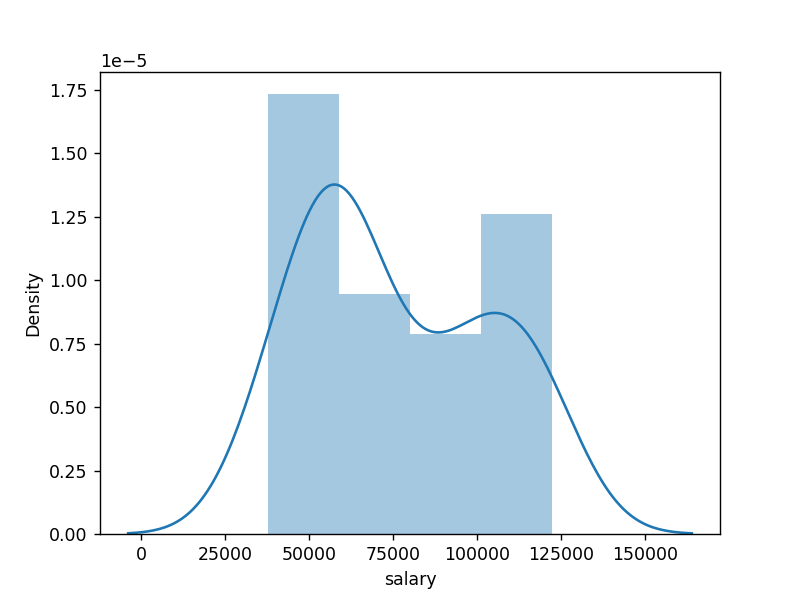

<AxesSubplot:xlabel='salary', ylabel='Density'>

In [207]:
sns.distplot(df['salary'])

<IPython.core.display.Javascript object>


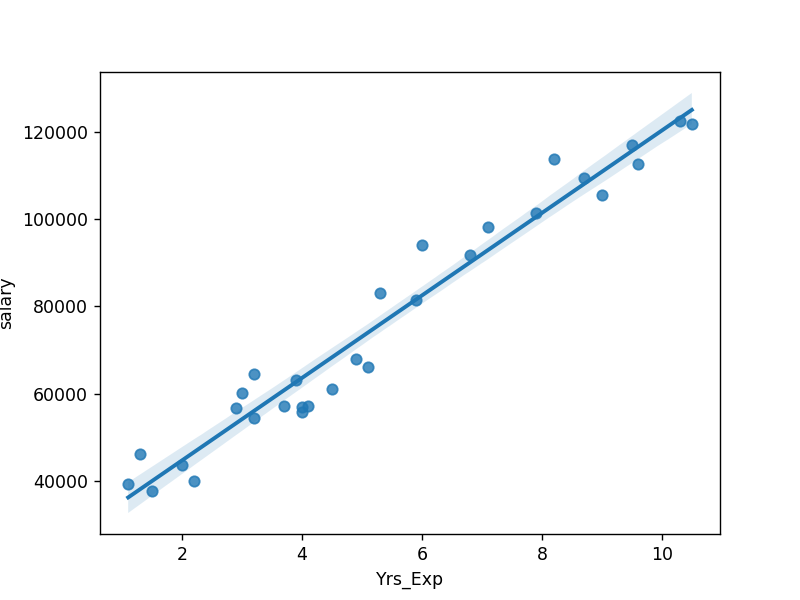

<AxesSubplot:xlabel='Yrs_Exp', ylabel='salary'>

In [205]:
sns.regplot(x=df["Yrs_Exp"], y=df["salary"])

In [168]:
# Renaming Columns
df=df.rename({'Salary':'salary', 'YearsExperience':'Yrs_Exp'},axis=1)
df

,Yrs_Exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Correlation 

In [169]:
df.corr()

,Yrs_Exp,salary
Yrs_Exp,1.000000,0.978242
salary,0.978242,1.000000


# Create Model

In [170]:
model1 = smf.ols("salary~Yrs_Exp",data=df).fit()

In [171]:
#Coefficients
model1.params

Intercept    25792.200199
Yrs_Exp       9449.962321
dtype: float64

In [172]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)   

Intercept    11.346940
Yrs_Exp      24.950094
dtype: float64 
 Intercept    5.511950e-12
Yrs_Exp      1.143068e-20
dtype: float64


In [173]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Model Prediction

In [174]:
# Manual prediction for say 3.5 Years Experience
salary = (25792.200199) + (9449.962321)*(3.5)
salary

58867.0683225

In [175]:
#Prediction for 3.5 & 5 Years Experience 
new_data=pd.Series([3.5,5])
new_data

0    3.5
1    5.0
dtype: float64

In [176]:
data_pred=pd.DataFrame(new_data,columns=['Yrs_Exp'])
data_pred

,Yrs_Exp
0,3.5
1,5.0


In [177]:
model1.predict(data_pred)

0    58867.068324
1    73042.011806
dtype: float64